In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
import datetime
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Set plot style
sns.set(color_codes=True)

In [3]:
cwd = os.getcwd()
DF=os.path.join(cwd, 'clean_salesKansas_df.csv')
df=pd.read_csv(DF)

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

Bivariate Analysis
1. Determine the correlation of all continous IV with DV
2. Correlation between IV and DV : determines the direction and strength of the relationship between 2 vars
3. reduce  variables, by determining which variables are not important -> does not have an effect on price
4. Create, if necessary,  dummy variables or banding
5. separate analysis for continous & for categorical/discrete

Categorical Variables : waterfront, view, renovated_flag, zip code, bedrooms, bathrooms, floors, condition and grade 


Bivariate Analysis: Continuos Variables

In [5]:
df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_basement', 'age_renovated', 'zipcode', 'lat', 'long',
       'Price(log10)', 'zscore', 'Sales_year', 'Sales_year-month',
       'sqft_living(log10)', 'sqft_lot(log10)', 'sqft_above(log10)',
       'per_living', 'per_above', 'age', 'renovated_flag'],
      dtype='object')

In [6]:
df.dtypes

bedrooms                int64
bathrooms             float64
floors                float64
waterfront              int64
view                    int64
condition               int64
grade                   int64
sqft_basement           int64
age_renovated           int64
zipcode                 int64
lat                   float64
long                  float64
Price(log10)          float64
zscore                float64
Sales_year              int64
Sales_year-month       object
sqft_living(log10)    float64
sqft_lot(log10)       float64
sqft_above(log10)     float64
per_living            float64
per_above             float64
age                     int64
renovated_flag          int64
dtype: object

In [7]:
#calculate the correlation between variables of type int64 and float64
correlation=df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

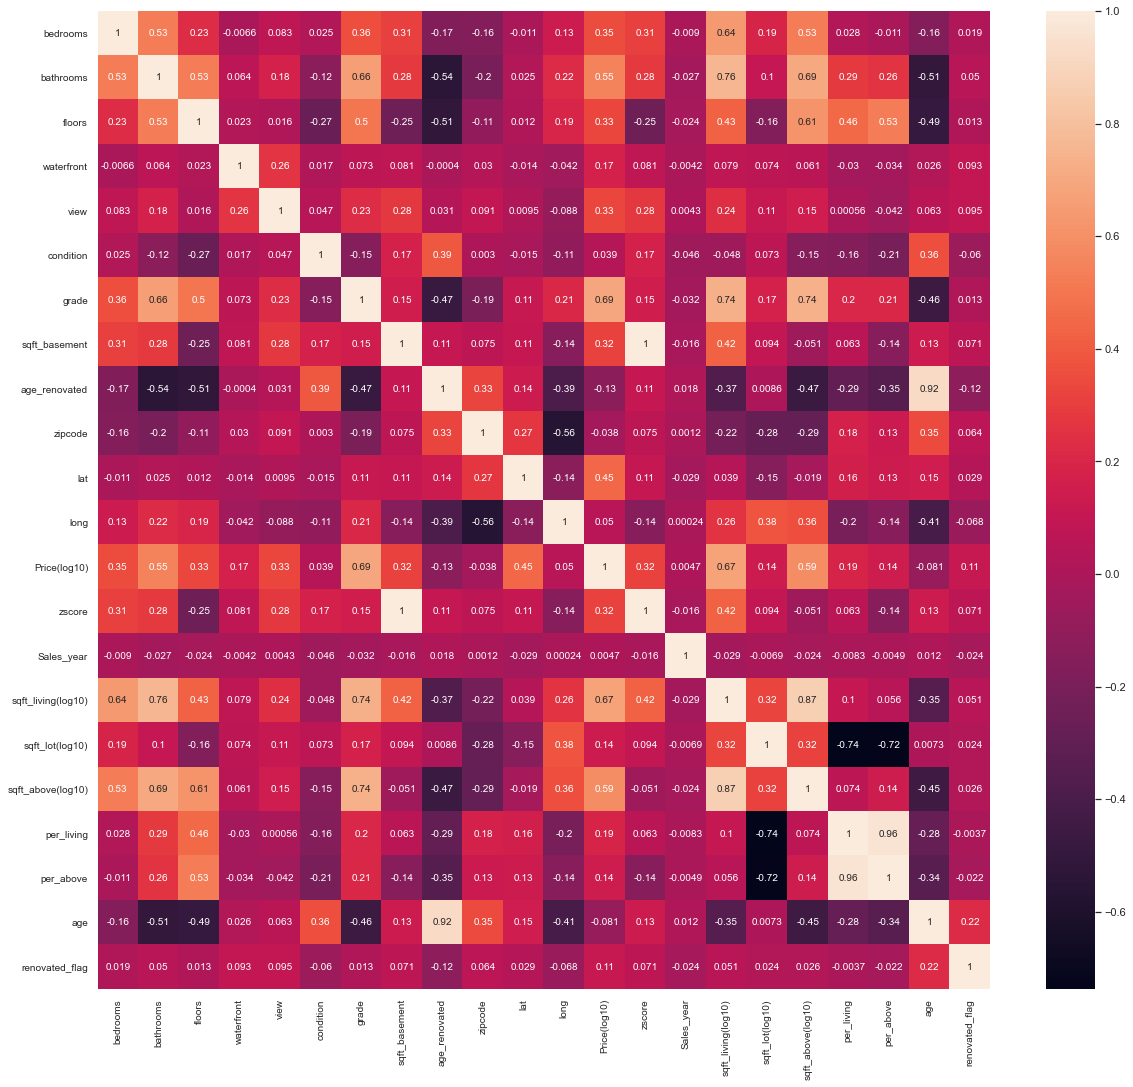

In [8]:
#Plot Correlation, Heat Correlation
plt.figure(figsize=(20,18))

sns.heatmap(correlation, xticklabels=correlation.columns.values,
           yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})

#Axis tick size 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show

Analysis
- ignore a variable only if the correlation is very LOW i.e. less than 0.2
- These variables are less likely to explain DV as their correlation to price is very low 

REDUCE THE IVs WHICH ARE MULTI-COLLINEAR
What is multi-colinearity? - Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. A measure of colinearity among predictor variables within a multiple regression 
VIF = 1 /(1- R2) higher R2 -> higher VIF
Use of VIF (VARIANCE INFLATION FACTOR) test to check multi-colinearity
Iterative process -> remove one variable at once and test the VIF test
DATA SCIENTISTS HAVE RELAXED THE CUTOFF TO ABOUT 3 -> keep all variables that are less than 3

In [9]:
# the independent variables set
X = df[['bedrooms', 'bathrooms', 'floors',  'condition','grade', 'lat', 'long', 'sqft_basement', 'age_renovated','per_living', 
'per_above', 'sqft_living(log10)', 'sqft_lot(log10)', 'sqft_above(log10)', 'age']]
X=X.assign(const=1)

In [10]:
X.columns

Index(['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'lat', 'long',
       'sqft_basement', 'age_renovated', 'per_living', 'per_above',
       'sqft_living(log10)', 'sqft_lot(log10)', 'sqft_above(log10)', 'age',
       'const'],
      dtype='object')

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [12]:
vif_data.round(1)

,feature,VIF Factor
0,bedrooms,1.8
1,bathrooms,3.3
2,floors,2.7
3,condition,1.2
4,grade,2.9
5,lat,1.1
6,long,1.5
7,sqft_basement,8.3
8,age_renovated,7.4
9,per_living,41.9


In [13]:
del X['per_above']

In [14]:
X.columns
X.shape

(21612, 15)

In [15]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [16]:
vif_data.round(1)

,feature,VIF Factor
0,bedrooms,1.8
1,bathrooms,3.3
2,floors,2.7
3,condition,1.2
4,grade,2.9
5,lat,1.1
6,long,1.5
7,sqft_basement,8.3
8,age_renovated,7.4
9,per_living,3.8


In [17]:
del X['sqft_living(log10)']

In [18]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [19]:
vif_data.round(1)

,feature,VIF Factor
0,bedrooms,1.8
1,bathrooms,3.3
2,floors,2.7
3,condition,1.2
4,grade,2.9
5,lat,1.1
6,long,1.5
7,sqft_basement,2.0
8,age_renovated,7.4
9,per_living,3.8


In [20]:
del X['age_renovated']

In [21]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [22]:
vif_data.round(1)

,feature,VIF Factor
0,bedrooms,1.8
1,bathrooms,3.3
2,floors,2.7
3,condition,1.2
4,grade,2.9
5,lat,1.1
6,long,1.5
7,sqft_basement,2.0
8,per_living,3.8
9,sqft_lot(log10),3.7


In [23]:
del X['sqft_above(log10)']

In [24]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [25]:
vif_data.round(1)

,feature,VIF Factor
0,bedrooms,1.5
1,bathrooms,3.0
2,floors,2.5
3,condition,1.2
4,grade,2.1
5,lat,1.1
6,long,1.5
7,sqft_basement,1.7
8,per_living,3.8
9,sqft_lot(log10),3.4


In [26]:
del X['per_living']

In [27]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [28]:
vif_data.round(2)

,feature,VIF Factor
0,bedrooms,1.51
1,bathrooms,2.95
2,floors,2.22
3,condition,1.20
4,grade,2.12
5,lat,1.12
6,long,1.50
7,sqft_basement,1.63
8,sqft_lot(log10),1.46
9,age,2.07


All IV have a VIF less than 3 

In [29]:
X.columns

Index(['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'lat', 'long',
       'sqft_basement', 'sqft_lot(log10)', 'age', 'const'],
      dtype='object')

BIVARIATE ANALYSIS FOR CATEGORICAL IV

ANOVA: statistical test that aids to find the correlation between categorical variables
- tests whether there is a significant differences between the means of two or more groups
- returns the f-score: variation between sample groups means divided by the variation within the same group 
- p-value: confidence degree, determines whether a result is statistically significant
There is a strong correlation between variables if the ANOVA gives us a large f-test value and a small p-value

In [30]:
df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_basement', 'age_renovated', 'zipcode', 'lat', 'long',
       'Price(log10)', 'zscore', 'Sales_year', 'Sales_year-month',
       'sqft_living(log10)', 'sqft_lot(log10)', 'sqft_above(log10)',
       'per_living', 'per_above', 'age', 'renovated_flag'],
      dtype='object')

In [31]:
dfCAT=df[[ 'waterfront', 'view', 'renovated_flag', 'Price(log10)', ]]
headers = ['waterfront', 'view', 'renovated_flag', 'price']
dfCAT.columns=headers

In [32]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
for variable in dfCAT.columns:
    model = ols('price ~ C('+variable+')', data=dfCAT).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    print(aov_table)

                    sum_sq       df          F         PR(>F)
C(waterfront)    34.466503      1.0  679.42073  1.695775e-147
Residual       1096.259044  21610.0        NaN            NaN
               sum_sq       df            F  PR(>F)
C(view)    123.689431      1.0  2654.252964     0.0
Residual  1007.036115  21610.0          NaN     NaN
                        sum_sq       df           F        PR(>F)
C(renovated_flag)    14.728610      1.0  285.202622  1.412039e-63
Residual           1115.996936  21610.0         NaN           NaN
                sum_sq       df             F  PR(>F)
C(price)  1.130726e+03   4027.0  1.761884e+23     0.0
Residual  2.802309e-20  17584.0           NaN     NaN


 F-value is high for all the variables meaning that there are significant differences between groups means of the price in the categorical variable and they might be significant. However,P-values are very small (p-values<0.05>) only for waterfront and renovated_flag different from View. This shows that the mean between group samples are statistically significant.

SPLITTING THE DATA INTO TEST & TRAIN

- A way to test the model 
- Build the model using the training DataSet and determine the error between the price_log predicted by the model (or equation) VS the actual price in the training data itself.
- Minimize the error using the training data by improving the model (e.g adding or removing variables)
- Use the test data to predict price_log using the model and determine the error between  real prices vs the predicted
-If the error is high, model needs to be improved because it only works for the training data 


Although view shows 

In [73]:
from sklearn.model_selection import train_test_split
#Split data into random train and test subsets
x_data=df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',  'grade', 'lat',
            'sqft_basement', 'sqft_lot(log10)', 'Sales_year']]

y_data=df['Price(log10)']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)


Run model removing the variables rejected from VIF, correlation and Bi-variate analysis Categorical 

In [74]:
#Model using training data
lm_tr=LinearRegression()
lm_tr.fit(x_train, y_train)
Y_hat_train = lm_tr.predict(x_train)

Results Summary

In [75]:
from sklearn import metrics

print('linear model1')
mean_squared_error=metrics.mean_squared_error(y_train,Y_hat_train)
print('Sqaured mean error', round(np.sqrt(mean_squared_error), 2))
print('R squared training',round(lm_tr.score(x_train, y_train), 3))
print('R sqaured testing',round(lm_tr.score(x_test, y_test), 3))
print('intercept', lm_tr.intercept_)
print('coefficient', lm_tr.coef_)

linear model1
Sqaured mean error 0.13
R squared training 0.702
R sqaured testing 0.699
intercept -66.11992241761713
coefficient [1.51886802e-02 3.14114305e-02 3.19504570e-02 2.40924966e-01
 1.01483207e-01 9.75215670e-02 6.51616561e-01 6.14064586e-05
 4.15634640e-02 1.97059202e-02]


Distribution Plot
counts the predicted values and the actual values 

C:\Users\asist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\asist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price(log10)', ylabel='Density'>

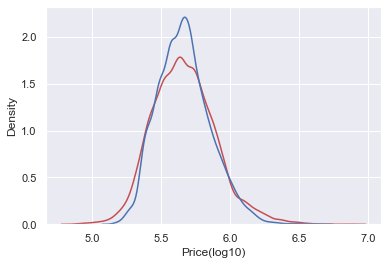

In [76]:
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat_train, hist=False, color="b", label="Fitted Values" , ax=ax1)

Improve the model by removing variables (floors)

In [78]:
x_train1=x_train[['bedrooms', 'bathrooms', 'waterfront',  'view','grade', 'lat',
            'sqft_basement', 'sqft_lot(log10)', 'Sales_year']]
x_test1=x_test[['bedrooms', 'bathrooms', 'waterfront',  'view', 'grade', 'lat',
            'sqft_basement', 'sqft_lot(log10)', 'Sales_year']]

In [79]:
#Model using training data
lm_tr=LinearRegression()
lm_tr.fit(x_train1, y_train)
Y_hat_train2 = lm_tr.predict(x_train1)

In [80]:
from sklearn import metrics

print('linear model2')
mean_squared_error=metrics.mean_squared_error(y_train, Y_hat_train2)
print('Sqaured mean error', round(np.sqrt(mean_squared_error), 2))
print('R squared training',round(lm_tr.score(x_train1, y_train), 3))
print('R squared testing',round(lm_tr.score(x_test1, y_test), 3))
print('intercept', lm_tr.intercept_)
print('coefficient', lm_tr.coef_)

linear model2
Sqaured mean error 0.13
R squared training 0.7
R squared testing 0.697
intercept -65.06530219251898
coefficient [1.62454269e-02 4.02592256e-02 2.44535646e-01 1.01498685e-01
 1.01630735e-01 6.49675133e-01 4.69884373e-05 3.25608647e-02
 1.92442753e-02]


C:\Users\asist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\asist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price(log10)', ylabel='Density'>

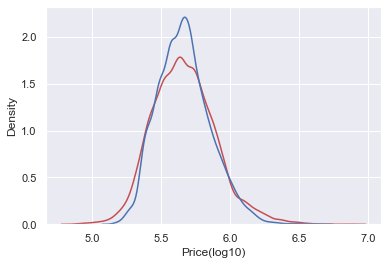

In [81]:
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat_train, hist=False, color="b", label="Fitted Values" , ax=ax1)

Second Degree Polynomial Regression

In [82]:
X=x_train.iloc[:].values
X_test=x_test.iloc[:].values
Y=y_train.iloc[:].values
Y_test=y_test.iloc[:].values

In [83]:
from sklearn.preprocessing import PolynomialFeatures
polyfeat=PolynomialFeatures(degree=2, include_bias=False)

xtrain_poly=polyfeat.fit_transform(X)
xtest_poly=polyfeat.fit_transform(X_test)

poly=LinearRegression()
poly.fit(xtrain_poly,Y)
polypred1=poly.predict(xtest_poly)


In [84]:
print('Polynomial model1')
mean_squared_error = metrics.mean_squared_error(Y_test, polypred1)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, Y), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, Y_test), 3))

Polynomial model1
Mean Squared Error (MSE)  0.11
R-squared (training)  0.749
R-squared (testing)  0.748


C:\Users\asist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\asist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

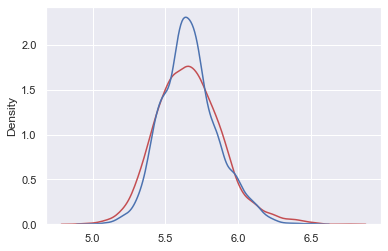

In [85]:
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(polypred1, hist=False, color="b", label="Fitted Values" , ax=ax1)

Third Degree Polynomial Regression 

In [86]:
polyfeat = PolynomialFeatures(degree=3, include_bias=False)

xtrain_poly=polyfeat.fit_transform(X)
xtest_poly=polyfeat.fit_transform(X_test)

poly=LinearRegression()
poly.fit(xtrain_poly,Y)
polypred2=poly.predict(xtest_poly)

In [87]:
print('Polynomial model2')
mean_squared_error = metrics.mean_squared_error(Y_test, polypred2)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, Y), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, Y_test), 3))

Polynomial model2
Mean Squared Error (MSE)  0.11
R-squared (training)  0.787
R-squared (testing)  0.767


C:\Users\asist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\asist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

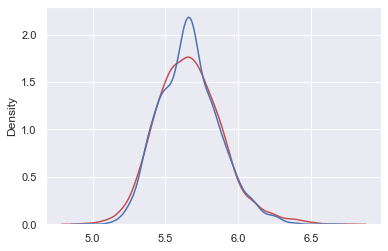

In [88]:
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(polypred2, hist=False, color="b", label="Fitted Values" , ax=ax1)

Analysis
R-squared values for both train and testing data are similar indicating that the model works good on new data (test_data). Mean squared Error (MSE) is acceptable, as its value is low and it is also an indication that model is significant and fits the data appropiately 

Third Degree Polynomial Regression  (removing floors)

In [89]:
X1=x_train1.iloc[:].values
X_test1=x_test1.iloc[:].values
Y=y_train.iloc[:].values
Y_test=y_test.iloc[:].values

In [90]:
polyfeat = PolynomialFeatures(degree=3, include_bias=False)

xtrain_poly=polyfeat.fit_transform(X1)
xtest_poly=polyfeat.fit_transform(X_test1)

poly=LinearRegression()
poly.fit(xtrain_poly,Y)
polypred3=poly.predict(xtest_poly)

In [91]:
print('Polynomial model3')
mean_squared_error = metrics.mean_squared_error(Y_test, polypred3)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, Y), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, Y_test), 3))

Polynomial model3
Mean Squared Error (MSE)  0.11
R-squared (training)  0.797
R-squared (testing)  0.785


C:\Users\asist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\asist\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

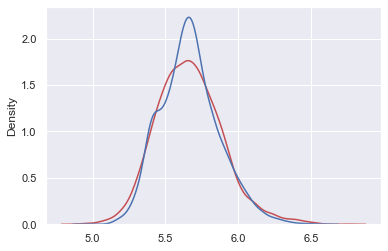

In [93]:
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(polypred3, hist=False, color="b", label="Fitted Values" , ax=ax1)

Distribution of all variables against the price(Log10)

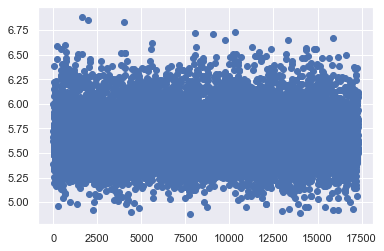

In [ ]:
x_train=np.arange(0,len(x_train),1)
plt.scatter(x_train, y_train)
